# Black-Scholes Model

Calculates the price of a vanilla European call or put option
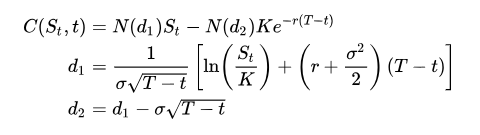

In [8]:
import numpy as np
import math

In [9]:
def phi(x):
    return (1 + math.erf(x / np.sqrt(2))) / 2

def black_scholes(S, K, T, r, sigma, option = 'call'):
    
    #S: spot(current) price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility
    
    d1 = (np.log(S/K) + T * (r + 0.5 * sigma ** 2)) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option == 'call':
        price = S * phi(d1) - K * np.exp(-r * T) * phi(d2)
    if option == 'put':
        price = K * np.exp(-r * T) * phi(-d2) - S * phi(-d1)
        
    return price

In [10]:
black_scholes(100,100,1,0.05,0.10)

6.804957708822158

In [11]:
black_scholes(100,100,1,0.05,0.10,'put')

1.9279001588935571

# Black-Scholes with dividend yield

Calculates the price of a vanilla European call or put option with dividend yield
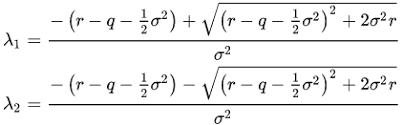

In [12]:
def black_scholes_with_dividends(S, K, T, r, sigma, q, option = 'call'):
    
    #S: spot(current) price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility
    #q: dividend rate of asset(assumed to be paid at a constant rate)
    
    d1 = (np.log(S/K) + T * (r - q + 0.5 * sigma ** 2)) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option == 'call':
        price = S * phi(d1) * np.exp(-q * T) - K * np.exp(-r * T) * phi(d2)
    if option == 'put':
        price = K * np.exp(-r * T) * phi(-d2) - S * np.exp(-q * T) * phi(-d1)
        
    return price

### Put-Call Parity

The put-call parity relates the prices of a European call and put with the following formula:



where
C(t) is the value of the call at time t,

P(t) is the value of the put of the same expiration date,

S(t) is the spot price of the underlying asset,

K is the strike price, and

B(t,T) is the present value of a zero-coupon bond that matures to 1 dollar at time T. This is equal to $\exp(-rT)$

We can verify this using random values for the parameters:

In [20]:
# define params
S_t = 100
K = 100
T = 1
r = 0.05
sigma = 0.10

# calculate the call and put prices as well as the value of a zero_coupon bond maturing to $1 at T
C_t = black_scholes(S_t, K, T, r, sigma, option = 'call')
P_t = black_scholes(S_t, K, T, r, sigma, option = 'put')
B_T = np.exp(-r * T)

# round to 7 decimal places and check for equality
print(round(C_t - P_t, 7) == round(S_t - K * B_T, 7))

True
